In [29]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67e-11
Msun=1.989e30
Mjup=1.898e27
AU=149.6e9
InRad=np.pi/180

m1=1*Msun
m2=1*Mjup
m3=40*Mjup

a1=6*AU
a2=100*AU
e1=0.001
e2=0.6
I1=64.7*InRad
I2=0.3*InRad
W1=0*InRad
W2=180*InRad
w1=45*InRad
w2=0*InRad

# Naoz's quadrupolar Hamiltonian

In [32]:
def L1(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    a1=orbi[0]
    value=m1*m2/(m1+m2) * (G*(m1+m2)*a1)**0.5
    return value

def L2(bulk,orbi):
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a2=orbi[1]
    value=m3*(m1+m2)/(m1+m2+m3) * (G*(m1+m2+m3)*a2)**0.5
    return value

def G1(bulk,e1):
    value=L1(bulk,orbi)*(1-e1**2)**0.5
    return value

def G2(bulk,orbi):
    e2=orbi[3]
    value=L1(bulk,orbi)*(1-e2**2)**0.5
    return value

bulk=[m1,m2,m3]
orbi=[a1,a2,e1,e2,I1,I2,W1,W2,w1,w2]

def HN(bulk,orbi,e1):
    
    m1=bulk[0]
    m2=bulk[1]
    m3=bulk[2]
    a1=orbi[0]
    a2=orbi[1]
    e2=orbi[3]
    I1=orbi[4]
    I2=orbi[5]
    W1=orbi[6]
    W2=orbi[7]
    w1=orbi[8]
    w2=orbi[9]
    
    DW = W2-W1
    
    C2=G**2/16 * (m1+m2)**7/(m1+m2+m3)**3 * m3**7/(m1*m2)**3 * L1(bulk,orbi)**4/(L2(bulk,orbi)**3 * G2(bulk,orbi)**3)
    
    value=C2/8*((1+3*np.cos(2*I2))*((2+3*e1**2)*(1+3*np.cos(2*I1))+30*e1**2*np.cos(2*w1)*np.sin(I1)**2) + 
               3*np.cos(2*DW)*(10*e1**2*np.cos(2*w1)*(3+np.cos(2*I1))+4*(2+3e1**2)*np.sin(I1)**2)*np.sin(I2)**2 + 
               12*(2+3*e1**2-5*e1**2*np.cos(2*w1))*np.cos(DW)*np.sin(2*I1)*np.sin(2*I2) + 
               120*e1**2*np.sin(I1)*np.sin(2*I2)*np.sin(2*w1)*np.sin(DW) - 
               120*e1**2*np.cos(I1)*np.sin(I2)**2*np.sin(2*w1)*np.sin(2*DW))
    
    return value

# Derived quadrupolar Hamiltonian

# Plotting

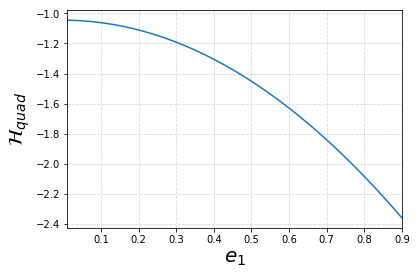

In [76]:
e1=np.linspace(0.01,0.9,100)

fig=plt.figure()
ax=plt.axes()
ax.plot(e1,HN(bulk,orbi,e1)/1e36)
ax.set_xlabel(r'$e_1$',fontsize=20)
ax.set_ylabel(r'$\mathcal{H}_{quad}$',fontsize=20)
ax.set_xlim(min(e1),max(e1))
ax.grid(alpha=0.5,linestyle='dashed')
plt.show()
